In [63]:
import numpy as np
import pylab as plt
import sympy as sp
from sympy.utilities.lambdify import lambdify

**A**

**#1**

*a)*

In [3]:
interpolacion =  lambda x,x0,y0,x1,y1: y0 + (x - x0) * (y1 - y0) / (x1 - x0)

*b)*

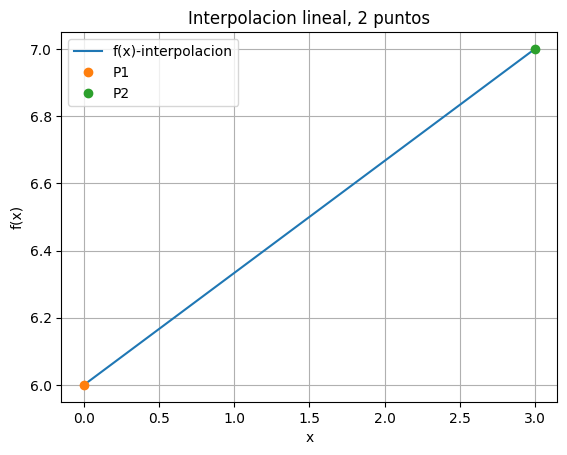

In [4]:
x0, y0 = 0, 6
x1, y1 = 3, 7
x = np.linspace(x0,x1,100)

plt.plot(x,interpolacion(x,x0,y0,x1,y1),label = "f(x)-interpolacion")
plt.plot(x0, y0, "o", label = "P1")
plt.plot(x1, y1, "o",label = "P2")
plt.title("Interpolacion lineal, 2 puntos")
plt.ylabel("f(x)")
plt.xlabel("x")
plt.grid()
plt.legend()
plt.show()

*c)*

In [24]:
def lineal(X, Y, x):
    M = np.arange(1, len(X))
    Valor = np.zeros_like(x, dtype=float)

    for m in M:
        TF = (x >= X[m - 1]) & (x <= X[m])
        Valor[TF] = Y[m - 1] + (x[TF] - X[m - 1]) * (Y[m] - Y[m - 1]) / (X[m] - X[m - 1])
    
    TF1, TF2 = (x < X[0]), (x > X[len(X) - 1])
    Valor[TF1] = Y[0] + (x[TF1] - X[0]) * (Y[1] - Y[0]) / (X[1] - X[0])
    Valor[TF2] = Y[len(X) - 2] + (x[TF2] - X[len(X) - 2]) * (Y[len(X) - 1] - Y[len(X) - 2]) / (X[len(X) - 1] - X[len(X) - 2])

    return Valor

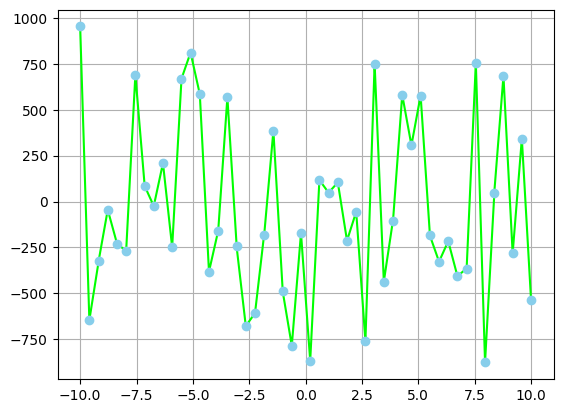

In [25]:
X = np.linspace(-10,10,50) 
Y = np.random.uniform(-1000,1000,len(X))
Z = np.linspace(-10,10,100000) 

plt.plot(Z,lineal(X, Y, Z), color = 'lime')
plt.plot(X,Y,'o', color = 'skyblue')
plt.grid()
plt.show()

**#2**

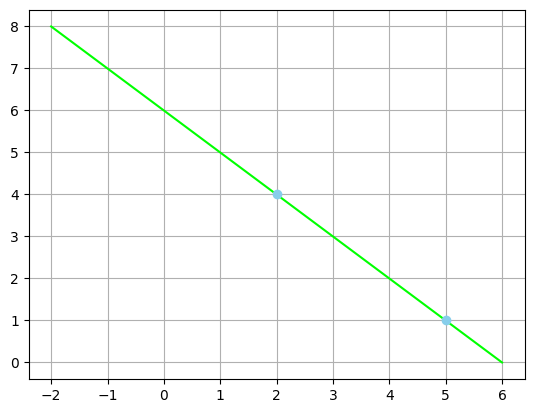

In [28]:
XX = np.array([2,5]) 
YY = np.array([4,1])
Z = np.linspace(-2,6,1000) 

plt.plot(Z,lineal(XX, YY, Z), color = 'lime')
plt.plot(XX,YY,'o', color = 'skyblue')
plt.grid()
plt.show()

La ecuacion lineal que pasa por los puntos: \((2, 4)\) y \((5, 1)\) es:

$y = -x + 6$

**#3**

In [7]:
def lagrange(X, Y, x):

    M = np.arange(0,len(X),1)
    Valor = 0

    for m in M:
        Multiplicador = Y[m]

        for n in M:
            if m != n:
                Multiplicador =  Multiplicador * ((x - X[n]) / (X[m] - X[n]))

        Valor = Valor + Multiplicador

    return Valor

**#4**

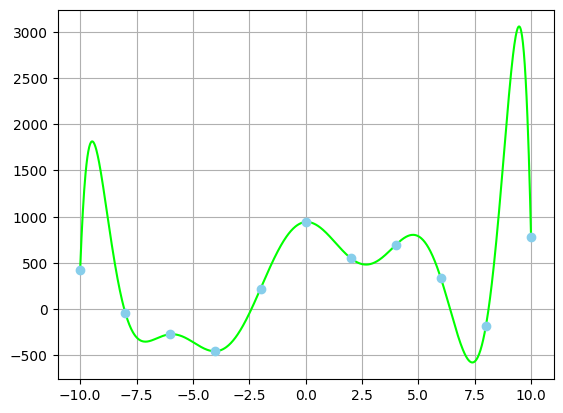

In [33]:
X = np.linspace(-10,10,11) 
Y = np.random.uniform(-1000,1000,len(X))
Z = np.linspace(-10,10,1000) 

plt.plot(Z,lagrange(X, Y, Z), color = 'lime')
plt.plot(X,Y,'o', color = 'skyblue')
plt.grid()
plt.show()


**B**

Consideremos la funcion:

\begin{equation*} 
g(x) = \frac{1}{1+25x^2} 
\end{equation*}

en el intervalo $[-1,1]$, definamos un conjunto de puntos $n + 1$ equiespaciados en $[-1,1]$

**#1**

In [29]:
g = lambda x: ( 1 + ( 25*(x**2) ) )**(-1)

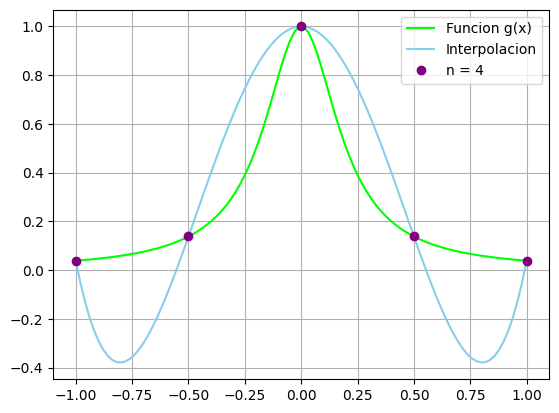

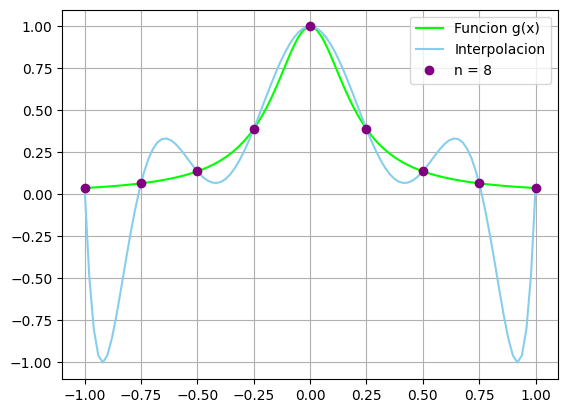

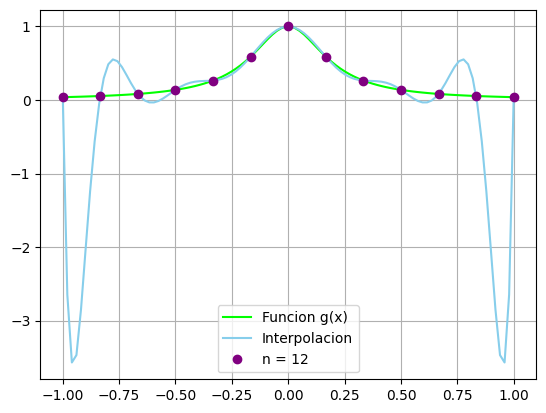

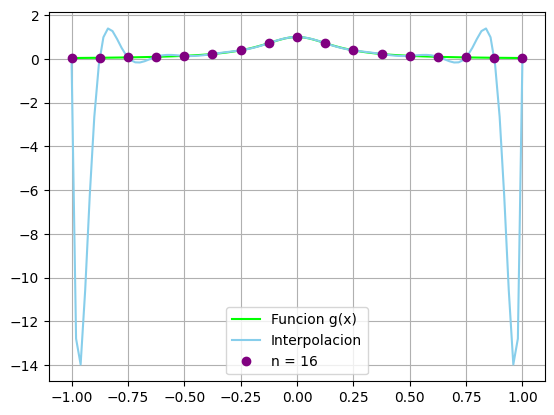

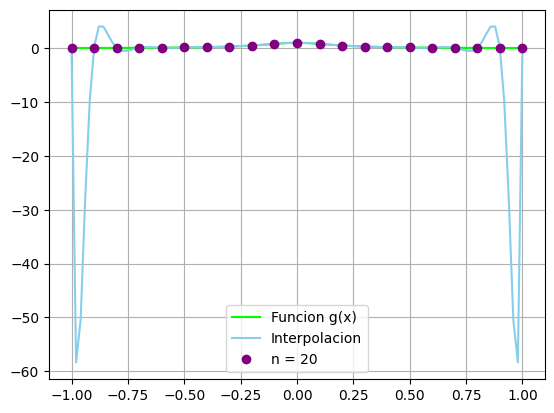

In [47]:
N = np.array([4,8,12,16,20])
Z = np.linspace(-1,1,100)

for n in N:
    U = np.linspace(-1,1,n + 1)
    V = g(U)
    W = lagrange(U, V, Z)

    plt.plot(Z,g(Z), color = 'lime', label = 'Funcion g(x)')
    plt.plot(Z,W, color = 'skyblue', label = 'Interpolacion')
    plt.plot(U,V,'o', color = 'purple', label = 'n = '+str(n) )
    plt.legend()
    plt.grid()
    plt.show()

**#2**

La cota del error , viene dado por: 
\begin{equation} 
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n) 
\end{equation}
emplee la libreria simbolica para realizar la estimación de dicha cota, sólo para n = 4, en el punto 0.5

In [83]:
x, z, n = sp.symbols('x'), 0.5, 4
gg = ( 1 + ( 25*(x**2) ) )**(-1)
UU = np.arange(-1,1, n + 1)

dgg_4 = sp.diff(gg, x, n + 1)
dgg4 = lambdify(x, dgg_4, "numpy")

er = (( np.math.factorial(n + 1) )**(-1)) * dgg4(UU).max()

for uu in UU:
    er = er * (z - uu)

print('El error de la interpolacion para n = '+str(n)+' es: '+str(er))


El error de la interpolacion para n = 4 es: 0.2470333531946261


C:\Users\JUANP\AppData\Local\Temp\ipykernel_11392\366038821.py:8: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  er = (( np.math.factorial(n + 1) )**(-1)) * dgg4(UU).max()
